In [4]:
# import packages 

import os
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import earthpy as et
import seaborn as sns

plt.ion()

# set working dir
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))


## import data 

In [6]:
july2018_temp_path = "data/colorado-flood/downloads/july-2018-temperature-precip.csv"
# download the data 
urllib.request.urlretrieve(url="https://nbdownloader.figshare.com/files/12948515",
                          filename=july2018_temp_path)

('data/colorado-flood/downloads/july-2018-temperature-precip.csv',
 <http.client.HTTPMessage at 0x11eee5978>)

In [12]:


# view data structure
july2018_temp.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

In [13]:
# import data into pandas
july2018_temp = pd.read_csv(july2018_temp_path)
july2018_temp.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


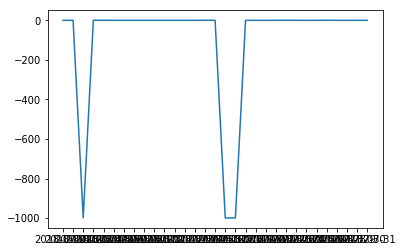

In [15]:
# plot the data
fig, ax = plt.subplots()

ax.plot(july2018_temp["date"],
        july2018_temp["precip"])
plt.show()

In [43]:
july2018_temp = pd.read_csv(july2018_temp_path,
                           parse_dates=["date"],
                           index_col=["date","max_temp"],
                           na_values=[-999.0])

In [34]:
july2018_temp.head()
# you can't call this anymore
july2018_temp.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

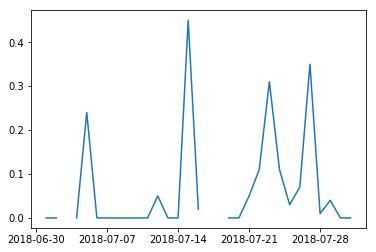

In [35]:
# plot the data again with dates set to be the index
fig, ax = plt.subplots()

ax.plot(july2018_temp.index,
        july2018_temp["precip"])
plt.show()

In [28]:
july2018_temp.min()

max_temp     75.0
precip     -999.0
dtype: float64

## Subset your data temporally

In [39]:
# subset for one year
july2018_temp['2018']

# subset for a set of dates
july2018_temp['2018-07-15':'2018-08-25']

,max_temp,precip
date,,
2018-07-15,93,0.45
2018-07-16,85,0.02
2018-07-17,84,NaN
2018-07-18,94,NaN
2018-07-19,97,0.00
2018-07-20,94,0.00
2018-07-21,93,0.05
2018-07-22,94,0.11
2018-07-23,78,0.31


## Resample the Data 
Let's go from daily to annual or some other time period

In [42]:
july2018_temp.resample("M").min()
july2018_temp

,max_temp,precip
date,,
2018-07-31,75,0.0
